In [1]:
#importing the necessary packages
import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
#reading and storing the dataset
df = pd.read_csv('C:/Users/chalamalla eshwar/Desktop/ml projects/Stress-Lysis.csv')
df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [3]:
df.tail()

,Humidity,Temperature,Step count,Stress Level
1996,21.82,90.82,96,1
1997,10.45,79.45,45,0
1998,27.22,96.22,135,2
1999,12.46,81.46,64,0
2000,16.87,85.87,50,1


In [4]:
df.shape

(2001, 4)

In [5]:
#creating new attribute based on stress level
df['Stess level categorical'] = df['Stress Level']
df['Stess level categorical'].replace(to_replace=[0, 1, 2], value=['low', 'normal', 'high'], inplace=True)
df.head()

,Humidity,Temperature,Step count,Stress Level,Stess level categorical
0,21.33,90.33,123,1,normal
1,21.41,90.41,93,1,normal
2,27.12,96.12,196,2,high
3,27.64,96.64,177,2,high
4,10.87,79.87,87,0,low


# data preprocessing and data visualization

<AxesSubplot:xlabel='Stess level categorical', ylabel='Count'>

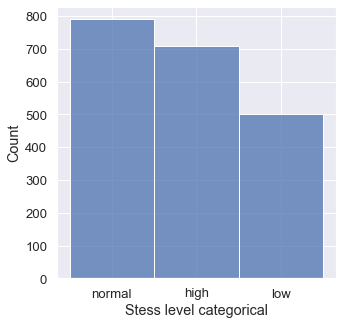

In [6]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.set(font_scale=1.2)
sns.histplot(data=df, x='Stess level categorical')

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

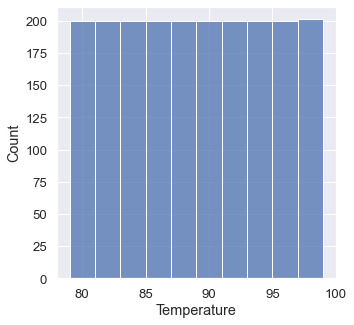

In [7]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.set(font_scale=1.2)
sns.histplot(data=df, x='Temperature', bins=10)

<AxesSubplot:>

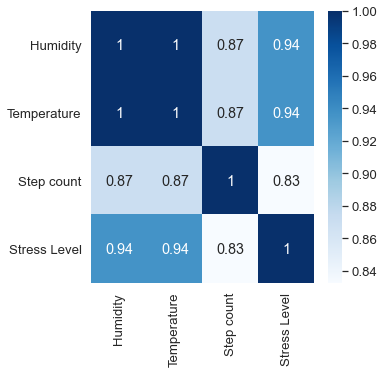

In [8]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.set(font_scale=1.2)
sns.heatmap(data=df[['Humidity', 'Temperature', 'Step count', 'Stress Level']].corr(), cmap='Blues', annot=True)

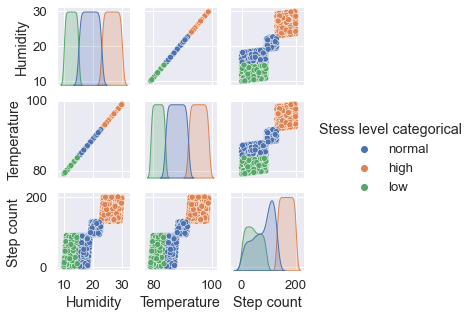

In [9]:
# pairplot 
sns.set(font_scale=1.2)
sns.pairplot(data=df[['Humidity', 'Temperature', 'Step count', 'Stess level categorical']], hue='Stess level categorical', height=1.5)

In [10]:
df.describe()

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


In [11]:
#getting the total null values in the dataset
df.isna().sum()

Humidity                   0
Temperature                0
Step count                 0
Stress Level               0
Stess level categorical    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Humidity                 2001 non-null   float64
 1   Temperature              2001 non-null   float64
 2   Step count               2001 non-null   int64  
 3   Stress Level             2001 non-null   int64  
 4   Stess level categorical  2001 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 78.3+ KB


# Building the model using SVM 

In [13]:
x=df[["Humidity","Temperature","Step count"]]

In [14]:
y=df["Stress Level"]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=42)

In [17]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [18]:
y_predicted=model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)

1.0

In [20]:
#predicting the result based on given input
features = np.array([[86,90,190,]])
print(model.predict(features))

[2]


# LogisticRegression

In [26]:
from sklearn.model_selection import train_test_split
x=df[["Humidity","Temperature","Step count"]]
y=df['Stress Level']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify=y, random_state=0)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C= 1.0, penalty='l2',random_state=0)
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pred = clf.predict(x_test)
cm = confusion_matrix(y_test, pred)
print(cm)
print(accuracy_score(y_test,pred))

[[101   0   0]
 [  0 158   0]
 [  0   1 141]]
0.9975062344139651


In [31]:
features = np.array([[86,90,190,]])
print(clf.predict(features))

[2]
